#### Rev B  couple of possibilities were checked more input data cleaning analysys

In [1]:
import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


In [2]:
!nvidia-smi

Fri Dec 25 09:13:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1. Installing libraries

In [4]:
# there are much more than required but it supossed to be playground to check various idea
!pip install --upgrade tables
!pip install flair
!pip install texthero
!pip install catboost
!pip install livelossplot
!pip install scikit-plot
!pip3 install sweetviz

     |████████████████████████████████| 4.3MB 20.9MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
     |████████████████████████████████| 450kB 13.1MB/s 
     |████████████████████████████████| 983kB 48.9MB/s 
     |████████████████████████████████| 1.1MB 47.1MB/s 
     |████████████████████████████████| 1.3MB 45.1MB/s 
     |████████████████████████████████| 71kB 11.4MB/s 
     |████████████████████████████████| 19.7MB 1.5MB/s 
     |████████████████████████████████| 798kB 46.6MB/s 
     |████████████████████████████████| 890kB 44.0MB/s 
     |████████████████████████████████| 2.9MB 47.1MB/s 
  Created wheel for sqlitedict: filename=sqlitedict-1.7.0-cp36-none-any.whl size=14376 sha256=613f6bfa478dba1d3389a98545d4ff27a315f7b48157cb8b72c9f4f5231f752d
  Stored in directory: /root/.cache/pip/wheels/cf/c6/4f/2c64a43f041415eb8b8740bd80e15e92f0d46c5e464d8e4b9b
  Created wheel for segtok: filename=segtok-1.5.10-cp36-

# 2. Mounting google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Preparing paths for  BERT pretrained transformers

In [6]:
# bert_model_name = 'cased_L-12_H-768_A-12' # taki byl model ale zmienilem na taki mniejszy aby przecwiczyc dodanie X bazujeacego na dwoch dodatkowych kolumnach czy moze wiecej
bert_model_name = 'uncased_L-2_H-128_A-2'
bert_model_date = '2020_02_20'
bert_model_path = f'https://storage.googleapis.com/bert_models/{bert_model_date}/{bert_model_name}.zip'
uncased=False

In [7]:
model_dir = f'/content/drive/MyDrive/BERT/{bert_model_name}'
model_dir

'/content/drive/MyDrive/BERT/uncased_L-2_H-128_A-2'

# 4. Downloading Bert

In [8]:
!wget {bert_model_path}
# !unzip the file
!unzip {bert_model_name}.zip -d {model_dir}


--2020-12-25 11:02:59--  https://storage.googleapis.com/bert_models/2020_02_20/uncased_L-2_H-128_A-2.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.144, 172.217.15.80, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16529104 (16M) [application/zip]
Saving to: ‘uncased_L-2_H-128_A-2.zip’

uncased_L-2_H-128_A 100%[===================>]  15.76M  60.6MB/s    in 0.3s    

2020-12-25 11:03:00 (60.6 MB/s) - ‘uncased_L-2_H-128_A-2.zip’ saved [16529104/16529104]

Archive:  uncased_L-2_H-128_A-2.zip
replace /content/drive/MyDrive/BERT/uncased_L-2_H-128_A-2/bert_model.ckpt.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/BERT/uncased_L-2_H-128_A-2/bert_model.ckpt.data-00000-of-00001  
  inflating: /content/drive/MyDrive/BERT/uncased_L-2_H-128_A-2/bert_config.json  
  inflating: /content/drive/MyDrive/B

In [9]:
!pip install keras_bert
!pip install transformers

  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=5af05e61baec0ed8f6ade477a4125a47b56a44438fa35ba80f7e2d7368518d03
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for keras-transformer: filename=keras_transformer-0.38.0-cp36-none-any.whl size=12944 sha256=109949e43760c4035592a4ddb1aa6735a765a3be0f21b6a45cc946894da3bd51
  Stored in directory: /root/.cache/pip/wheels/e5/fb/3a/37b2b9326c799aa010ae46a04ddb04f320d8c77c0b7e837f4e
  Created wheel for keras-pos-embd: filename=keras_pos_embd-0.11.0-cp36-none-any.whl size=7553 sha256=edf39ce98715b67600c591301884c0cefb51ce10342480ef48c968ea5d11da14
  Stored in directory: /root/.cache/pip/wheels/5b/a1/a0/ce6b1d49ba1a9a76f592e70cf297b05c96bc9f418146761032
  Created wheel for keras-multi-head: filename=keras_multi_head-0.27.0-cp36-none-any.whl size=15612 sha256=f2d76ebf061269f0bfa22417f0103a533ee7766d578e9416e278869b760a8f9b
  Stor

# 5. Import libraries

In [10]:
import pandas as pd
import numpy as np
np.random.seed(2020)

import tensorflow as tf


import xgboost as xgb
import catboost as ctb

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

from keras_bert import load_trained_model_from_checkpoint
from transformers import BertTokenizer


import joblib
import random
import re

import texthero as hero
import spacy
from spacy import displacy
from collections import defaultdict, Counter

from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings
from flair.data import Sentence

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Conv1D, MaxPool1D, Dropout, BatchNormalization, Bidirectional, Flatten
from tensorflow.keras.preprocessing import sequence
import tensorflow.keras.preprocessing.text as kpt 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from livelossplot import PlotLossesKeras
import tensorflow.keras.backend as K


from scikitplot.estimators import plot_learning_curve
from scikitplot.metrics import plot_confusion_matrix

from flair.data import Sentence, Dictionary
from flair.datasets import ClassificationCorpus

from flair.embeddings import WordEmbeddings, DocumentRNNEmbeddings, FlairEmbeddings, TransformerDocumentEmbeddings, DocumentPoolEmbeddings, TransformerWordEmbeddings, StackedEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from torch.optim.adam import Adam
from flair.visual.training_curves import Plotter
import texthero as hero
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial import distance
from html import unescape
import re



from pathlib import Path
from texthero import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv


from nltk.corpus import stopwords
import nltk

import os,shutil
import os,shutil

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 6. Loading data to df

In [17]:
train= pd.read_csv('/content/drive/My Drive/real_not/train.csv')
test=pd.read_csv('/content/drive/My Drive/real_not/test.csv')
submission = pd.read_csv('/content/drive/My Drive/real_not/sample_submission.csv')
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in train'.format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in train


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [13]:
train.fillna('unknown', inplace=True)
test.fillna('unknown', inplace=True)

In [15]:
def plot_sns_nr_occurencies(df, column, max_nr):
  # Plotting a bar graph of the number of tweets in each location, for the first ten locations listed
  # in the column 'location'
  location_count  = train[column].value_counts()
  location_count = location_count[:max_nr,]
  plt.figure(figsize=(10,5))
  sns.barplot(x=location_count.index, y= location_count.values, alpha=0.8)
  plt.title('Top {} '.format(max_nr))
  plt.ylabel('Number of Occurrences', fontsize=12)
  plt.xticks(rotation=45) 
  plt.xlabel(column, fontsize=12)
  plt.show()

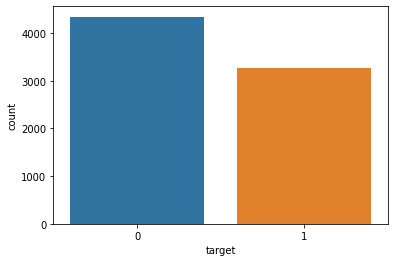

In [14]:
target = train['target']
sns.countplot(x=target);

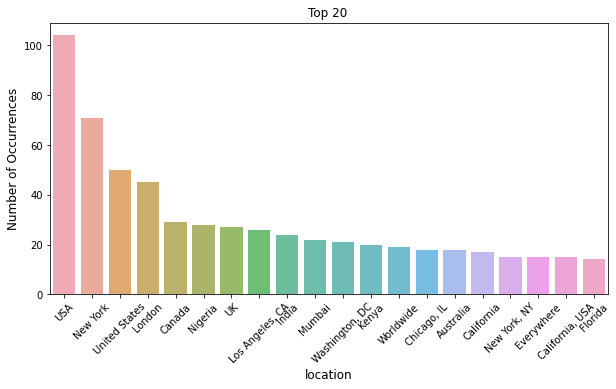

In [18]:
plot_sns_nr_occurencies(train, 'location', 20)

# 7.Concatenate train, test  for preprocessing and preparing embedings

In [19]:
df_all = pd.concat([train, test], sort=False)
df_all.shape

(10876, 5)

functions for some initial cleaning which is not done by hero

In [20]:


# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")



'Omg another Earthquake '

*there are a lot of %20 which was staying even after all cleaning thats why simple  regex to replace taht with space*

In [21]:
def remove_percent(text):
    emoji_pattern = re.compile('%20')
    return emoji_pattern.sub(r' ', text)

remove_percent("Omg another%Earthquake 😔😔")

'Omg another%Earthquake 😔😔'

In [22]:
temp_list=[ 'keyword', 'location', 'text']

In [23]:
custom_pipeline = [#preprocessing.fillna,
                   preprocessing.remove_stopwords,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_digits,
                   preprocessing.remove_html_tags,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_diacritics
                   ]

In [24]:
def preproc(train):
  for i in temp_list:
    train[i]=train[i].apply(lambda x: remove_emoji(x))
    train[i]=train[i].apply(lambda x: remove_percent(x))

    train[i+'_cleaner'] = preprocessing.clean(train[i], custom_pipeline)
    test[i+'_cleaner'] = preprocessing.clean(test[i], custom_pipeline)
  return train


In [ ]:
preproc(train)

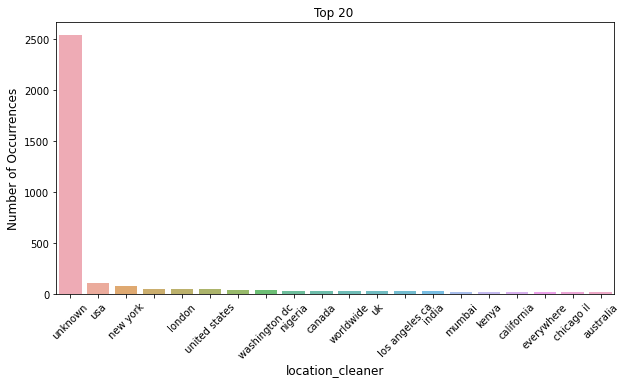

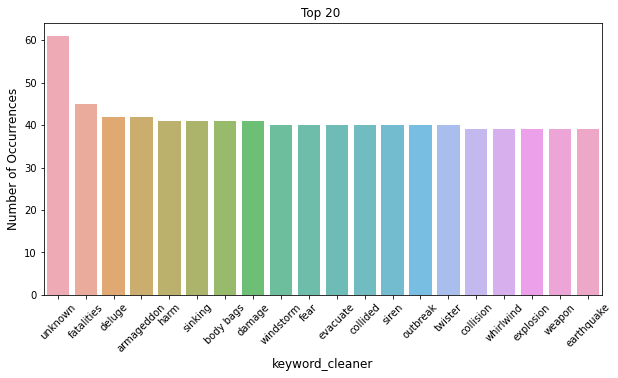

In [26]:
plot_sns_nr_occurencies(train, 'location_cleaner', 20)
plot_sns_nr_occurencies(train, 'keyword_cleaner', 20)

In [ ]:
preproc(df_all)

id  ...                                       text_cleaner
0         1  ...   our deeds reason earthquake may allah forgive us
1         4  ...              forest fire near la ronge sask canada
2         5  ...  all residents asked shelter place notified off...
3         6  ...    people receive wildfires evacuation orders c...
4         7  ...  just got sent photo ruby alaska smoke wildfire...
...     ...  ...                                                ...
3258  10861  ...  earthquake safety los angeles uo safety fasten...
3259  10865  ...  storm ri worse last hurricane my cityamp3other...
3260  10868  ...     green line derailment chicago httpcoutbxlcbiuy
3261  10874  ...  meg issues hazardous weather outlook hwo httpc...
3262  10875  ...  cityofcalgary activated municipal emergency pl...

[10876 rows x 8 columns]

*Column text/text_cleaner contain most of the information lets remove all the duplicates as standard procedure*

In [ ]:
def show_duplicates(train):

  # sorting by first name 
  train.sort_values("text", inplace = True) 
    
  # making a bool series 
  bool_series = train["text"].duplicated() 
    
  # displaying data 
  train.head() 
    
  # display data 
  print(train[bool_series])

In [ ]:
def remove_duplicates(train):


  # sorting by first name 
  train.sort_values("text", inplace = True) 
    
  # making a bool series 
  bool_series = train["text"].duplicated() 
    
  # # displaying data 
  # train.head() 
    
  # # display data 
  # print(train[bool_series])
  train= train[~bool_series] 
  return train


In [ ]:
df_all= remove_duplicates(df_all)
show_duplicates(df_all)

In [ ]:
show_duplicates(df_all)

        id  ...                                       text_cleaner
4290  6094  ...  allah describes piling wealth thinking would l...
4299  6105  ...  allah describes piling wealth thinking would l...
4312  6123  ...  allah describes piling wealth thinking would l...
128    408  ...  askconnor zombie apocalypse item right weapon ...
6378  9114  ...  bestnaijamade 16yr old pkk suicide bomber deto...
...    ...  ...                                                ...
6123  8739  ...  horrible sinking feeling uave home phone reali...
6091  8698  ...  horrible sinking feeling uave home phone reali...
6103  8714  ...  horrible sinking feeling uave home phone reali...
2400  8033  ...      wowo   nigerian refugees repatriated cameroon
5620  8018  ...      wowo   nigerian refugees repatriated cameroon

[198 rows x 8 columns]


# 8.Default possibilities of hero package ie PCA, tfidf, named entities, words visualisation, kmeans

## PCA, tfidf, named entities

In [ ]:
train['tfidf'] = (
    hero.tfidf(train['text'], max_features=100)
)
train[["tfidf", "target"]].head(10)

tfidf  target
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.69734111...       1
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1
5  [0.0, 0.38247304100575746, 0.0, 0.0, 0.0, 0.0,...       1
6  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1
7  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.254...       1
8  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1
9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...       1

In [ ]:
train['pca'] = hero.pca(train['tfidf'])
hero.scatterplot(
    train, 
    col='pca', 
    color='target', 
    title="PCA --> Real or not <-- Analysis train set"
)

![### PCA plot ](pca.JPG)

In [ ]:
train['named_entities'] = hero.named_entities(train['text'])
train[['named_entities', 'target']].head(20)

named_entities  target
0                             [(Deeds, PERSON, 4, 9)]       1
1   [(La Ronge Sask, FAC, 17, 30), (Canada, GPE, 3...       1
2                                                  []       1
3   [(13,000, CARDINAL, 0, 6), (California, GPE, 5...       1
4                    [(Ruby #Alaska, PERSON, 30, 42)]       1
5   [(RockyFire, PERSON, 1, 10), (California Hwy, ...       1
6   [(Manitou, GPE, 64, 71), (Colorado Springs, GP...       1
7                                                  []       1
8                                                  []       1
9                                                  []       1
10                          [(Three, CARDINAL, 0, 5)]       1
11                [(Haha South Tampa, PERSON, 0, 16)]       1
12  [(#raining, MONEY, 0, 8), (#Florida, MONEY, 19...       1
13  [(Flood, PERSON, 1, 6), (Bago Myanmar, GPE, 10...       1
14                           [(80, CARDINAL, 24, 26)]       1
15                                                 []       0
16                                                 []       0
17                             [(Summer, DATE, 0, 6)]       0
18                                                 []       0
19                                                 []       0

In [ ]:
NUM_TOP_WORDS = 100
hero.top_words(df_all['text_cleaner'])[:NUM_TOP_WORDS][:20]

i            2181
the           932
like          483
a             431
amp           428
fire          355
get           335
u             333
new           324
via           317
one           281
in            279
news          279
people        268
us            238
it            226
emergency     224
video         220
would         208
this          199
Name: text_cleaner, dtype: int64

In [ ]:
NUM_TOP_WORDS = 20
df_all.groupby('target')['text_cleaner'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

target            
0.0     i             1218
        the            370
        like           249
        amp            189
        new            167
        get            163
        a              140
        u              139
        one            131
        you            118
        body           115
        my             103
        it             100
        via             98
        would           97
        video           94
        people          89
        love            89
        in              88
        us              87
1.0     i              341
        the            289
        fire           174
        a              173
        news           137
        via            118
        in             116
        california     114
        disaster       111
        police         108
        suicide        106
        amp            106
        people         102
        killed          93
        like            91
        u               88
        s

## Visualisation, wordcloud

In [ ]:
# You will have to download the set of stop words the first time
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
stop_words[:3]

['i', 'me', 'my']

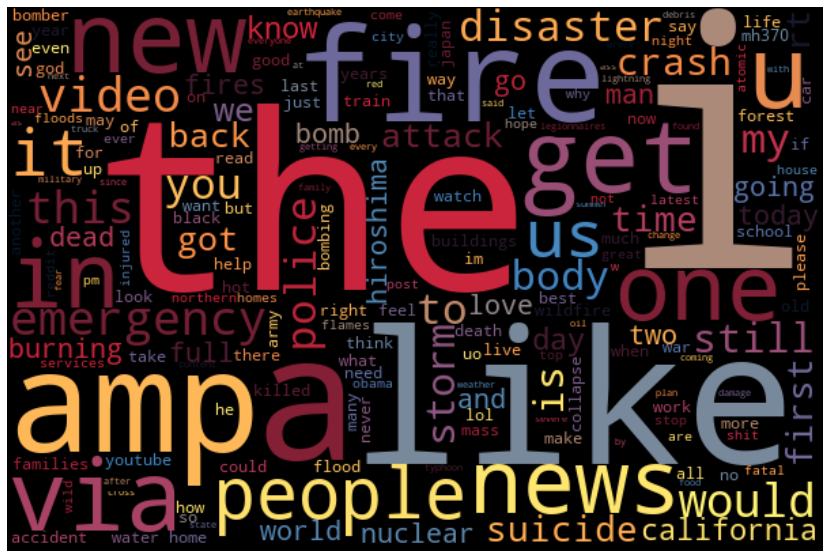

In [ ]:
# WordCloud with single line of code.

hero.visualization.wordcloud(df_all['text_cleaner'],width = 600, height= 400,background_color='black')

As there are many stop words lets remove them from column text_cleaner

In [ ]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_all['text_cleaner'] = df_all['text_cleaner'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

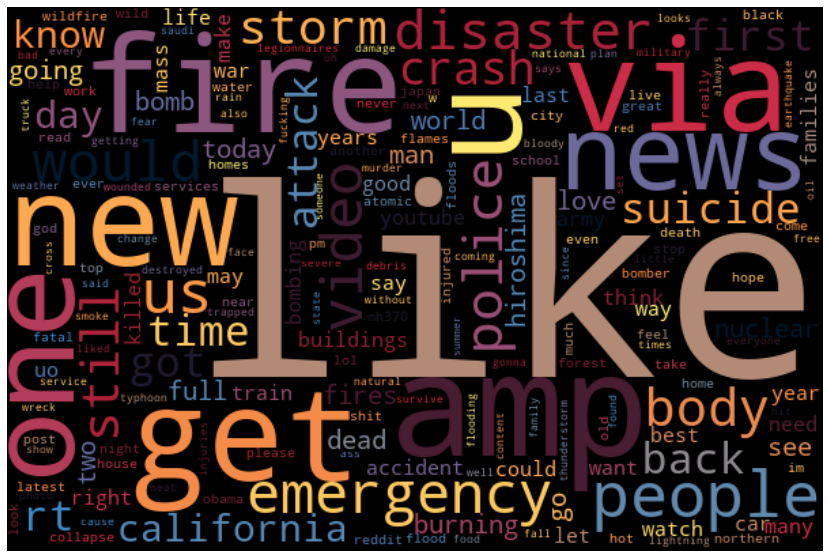

In [ ]:
hero.visualization.wordcloud(df_all['text_cleaner'],width = 600, height= 400,background_color='black')

looks much better... maybe in some next attempt own list should be prepared

In [ ]:
NUM_TOP_WORDS = 20
df_all.groupby('target')['text_cleaner'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

target            
0.0     like          249
        amp           189
        new           167
        get           163
        u             139
        one           131
        body          115
        via            98
        would          97
        video          94
        people         89
        love           89
        us             87
        day            86
        know           86
        back           85
        time           84
        got            83
        see            82
        full           82
1.0     fire          174
        news          137
        via           118
        california    114
        disaster      111
        police        108
        suicide       106
        amp           106
        people        102
        killed         93
        like           91
        storm          88
        u              88
        hiroshima      87
        crash          83
        fires          83
        us             80
        families   

there are differencies so the model should also see them

ther are diff

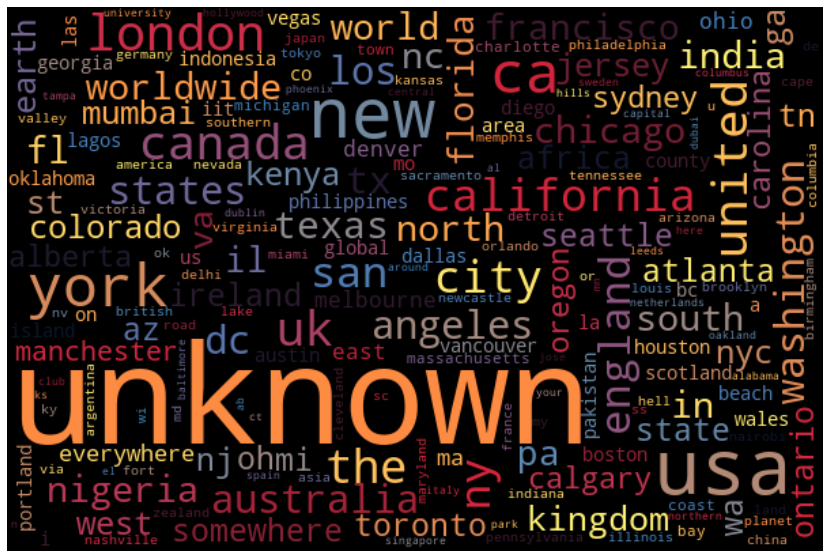

In [ ]:
hero.visualization.wordcloud(df_all['location_cleaner'],width = 600, height= 400,background_color='black')

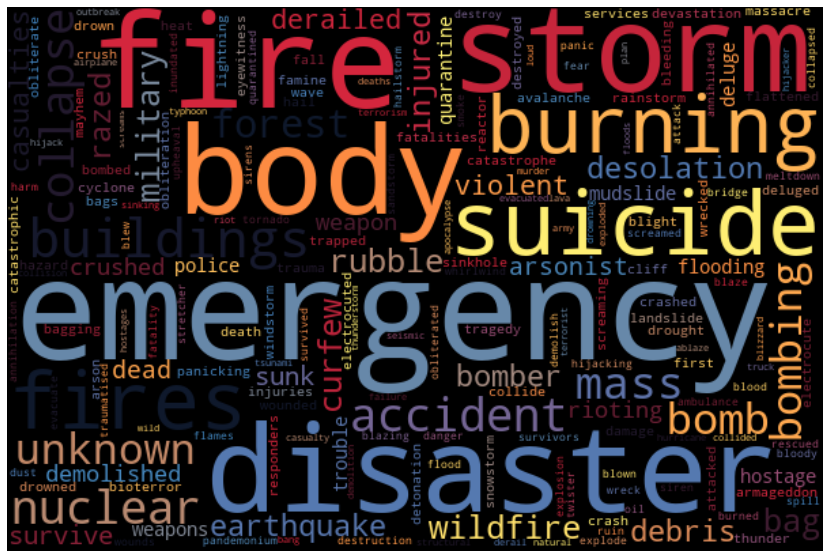

In [ ]:
hero.visualization.wordcloud(df_all['keyword_cleaner'],width = 600, height= 400,background_color='black')

# Kmeans checking required size with WSS elbow method for location, text, keword etc

## Stacked embedings using Flair framework

In [ ]:
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')
bert_embedding = TransformerWordEmbeddings('distilbert-base-uncased', fine_tune=True)

stacked_embeddings = StackedEmbeddings(
    embeddings=[flair_embedding_forward, flair_embedding_backward, bert_embedding])

embeddings = DocumentRNNEmbeddings([stacked_embeddings])

2020-12-24 09:48:12,966 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpbwhct_if


100%|██████████| 73034624/73034624 [00:03<00:00, 23501093.05B/s]

2020-12-24 09:48:16,411 copying /tmp/tmpbwhct_if to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2020-12-24 09:48:16,478 removing temp file /tmp/tmpbwhct_if
2020-12-24 09:48:29,542 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmpkmee9_o2


100%|██████████| 73034575/73034575 [00:03<00:00, 22374318.43B/s]

2020-12-24 09:48:33,124 copying /tmp/tmpkmee9_o2 to cache at /root/.flair/embeddings/news-backward-0.4.1.pt


2020-12-24 09:48:33,210 removing temp file /tmp/tmpkmee9_o2


In [ ]:
def calc_embeddings(text, embeddings):
  if len(text)==0:
    text='unknown'
  sent = Sentence(text)
  embeddings.embed(sent)
  return np.array(sent.embedding.detach().cpu())

In [ ]:
df_all.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'keyword_cleaner',
       'location_cleaner', 'text_cleaner', 'text_cleaner_1'],
      dtype='object')

In [ ]:
#it will take a while... 3min keword and text much more 10 min
%time  df_all['vectors_keyword'] = df_all.keyword_cleaner.map(lambda text: calc_embeddings(text, embeddings))

In [ ]:
%time  df_all['vectors_text'] = df_all.text_cleaner.map(lambda text: calc_embeddings(text, embeddings))

In [ ]:
%time  df_all['vectors_location'] = df_all.location_cleaner.map(lambda text: calc_embeddings(text, embeddings))



```
RuntimeError: There were no tensor arguments to this function 
(e.g., you passed an empty list of Tensors), but no fallback function 
is registered for schema aten::_cat. 
 This usually means that this function requires a non-empty list of Tensors.
```


*most likelly in locations names there are no words which are in embedings etc*

In [ ]:
def calculate_WSS(X, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k).fit(X)
        centroids = kmeans.cluster_centers_
        y_pred = kmeans.predict(X)
        curr_sse = 0

        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(X)):
            curr_center = centroids[y_pred[i]]
            curr_sse += (X[i, 0] - curr_center[0]) ** 2 + (X[i, 1] - curr_center[1]) ** 2

        sse.append(curr_sse)
    return sse

*Creating X array for WSS from vectors column*

In [ ]:
X_keyword=np.stack(df_all['vectors_keyword'])
X_text=np.stack(df_all['vectors_text'])

In [ ]:
def optimal_k_from_chart(X, k_max, column):
  #It takes quite long
  # k_max = 8

  xs = range(k_max)
  wss = calculate_WSS(X_keyword, k_max)


  plt.figure(figsize=(15, 5))
  plt.title('Optimal k for column ===>{}'.format(column)) # to wywalilo blad
  plt.ylabel('WSS')
  plt.xlabel('k')
  plt.plot(xs, wss, 'o-');

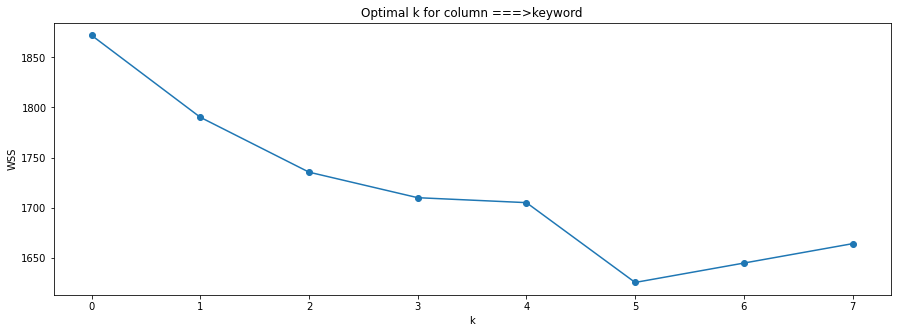

In [ ]:
column= 'keyword'
optimal_k_from_chart(X_keyword, 8, column)

*lets see some bigger value like 80*

CPU times: user 7min 19s, sys: 5min 6s, total: 12min 25s
Wall time: 6min 19s


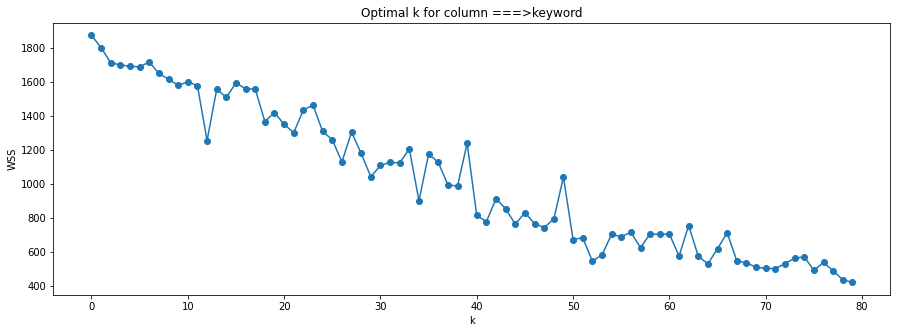

In [ ]:
#takes about 6min
%time  optimal_k_from_chart(X_keyword, 80, column)

*looks like 70 is the value where characteristic is a more or less flatt( lets say)*

CPU times: user 7min 22s, sys: 5min 8s, total: 12min 31s
Wall time: 6min 21s


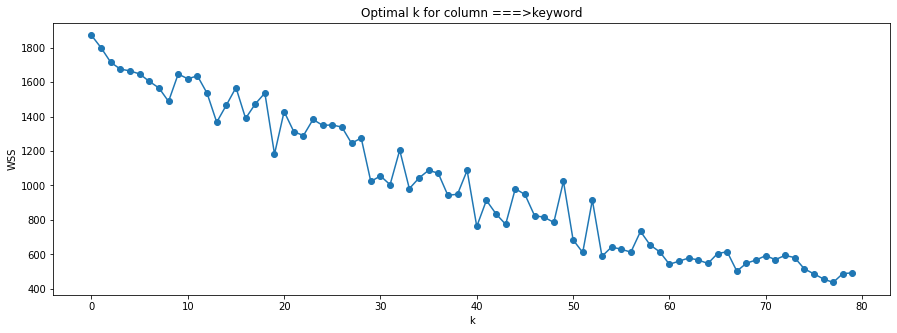

In [ ]:
%time   optimal_k_from_chart(X_text, 80, column)

*Here 70 is also similar value*

*lets create columns k_text_70, k_keyword_70*

In [ ]:
%time df_all['k70_means_text'] = hero.kmeans(df_all['vectors_text'], n_clusters=70)

In [ ]:
%time df_all['k7_means_text'] = hero.kmeans(df_all['vectors_text'], n_clusters=7)

In [ ]:
%time df_all['k70_means_keyword'] = hero.kmeans(df_all['vectors_keyword'], n_clusters=70)

In [ ]:
%time df_all['k7_means_keyword'] = hero.kmeans(df_all['vectors_keyword'], n_clusters=7)

*Some visualisation*

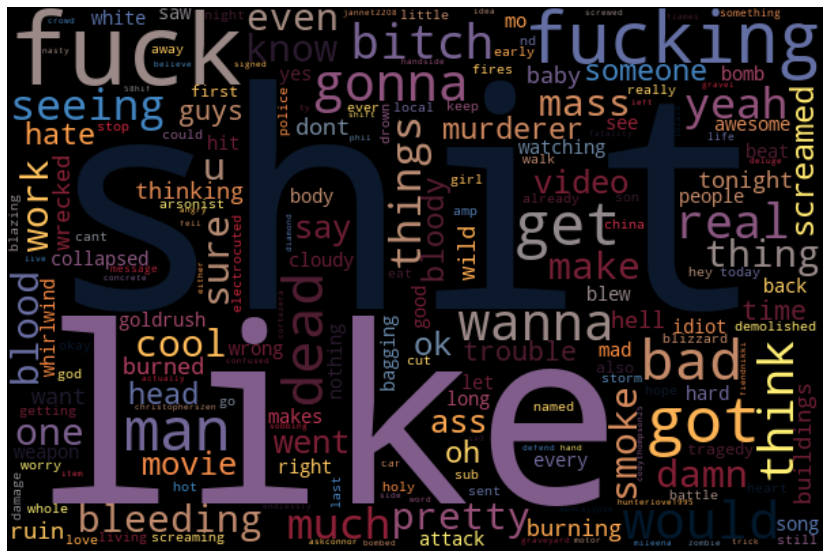

In [ ]:
hero.visualization.wordcloud(df_all[df_all['k70_means_text'] == 50]['text_cleaner'],width = 600, height= 400,background_color='black')

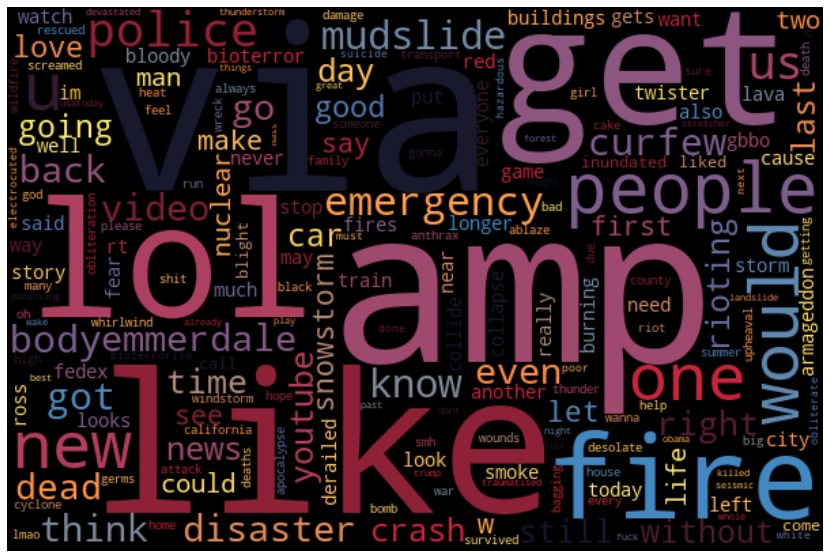

In [ ]:
hero.visualization.wordcloud(df_all[df_all['k7_means_text'] == 0]['text_cleaner'],width = 600, height= 400,background_color='black')

*k70 looks a bit more organised*

In [ ]:
df_all.groupby(['target', 'k70_means_text'])['id'].count()

target  k70_means_text
0.0     0                  36
        1                  74
        2                 102
        3                  38
        4                  67
                         ... 
1.0     65                 33
        66                 36
        67                 45
        68                 32
        69                 27
Name: id, Length: 139, dtype: int64

out of curiosity lets check

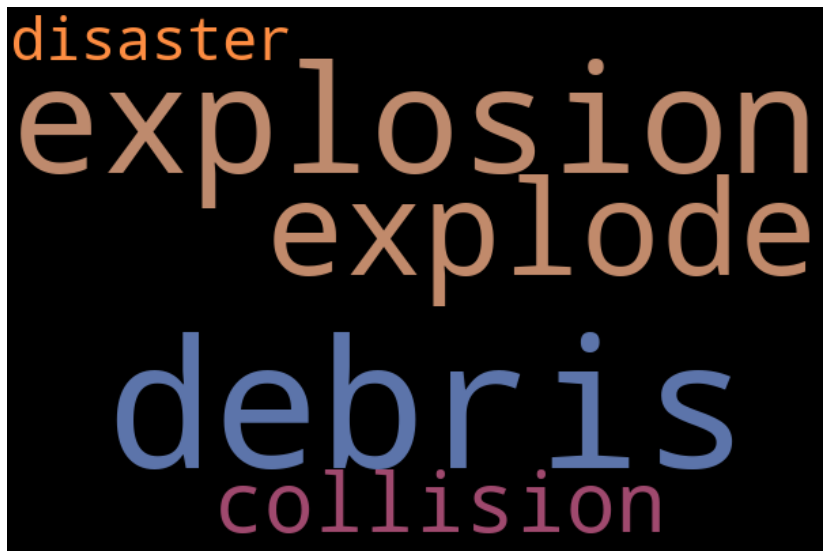

In [ ]:
hero.visualization.wordcloud(df_all[df_all['k70_means_keyword'] == 20]['keyword_cleaner'],width = 600, height= 400,background_color='black')

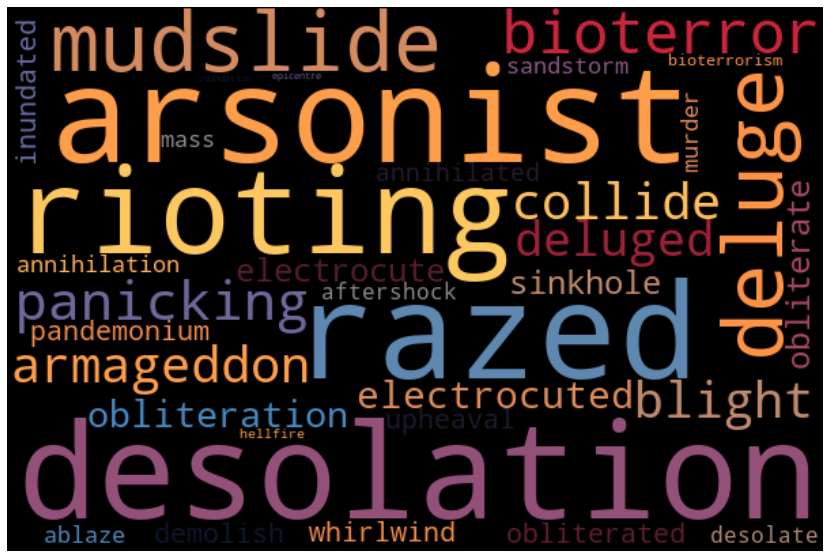

In [ ]:
hero.visualization.wordcloud(df_all[df_all['k7_means_keyword'] == 6]['keyword_cleaner'],width = 600, height= 400,background_color='black')

*It seems that those columns will not give good results there asimple too many but we could check in automatized run*

In [ ]:
df_all.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'keyword_cleaner',
       'location_cleaner', 'text_cleaner', 'tfidf', 'pca', 'named_entities',
       'vectors_keyword', 'vectors_text', 'k70_means_text', 'k7_means_text',
       'k70_means_keyword', 'k7_means_keyword'],
      dtype='object')

In [ ]:
train = df_all[ ~df_all['target'].isnull() ].copy()
test = df_all[ df_all['target'].isnull() ].copy()

In [ ]:
train.sample(3)

id    keyword  ... k70_means_keyword k7_means_keyword
186    265  ambulance  ...                46                2
5893  8415  sandstorm  ...                11                6
1858  2671      crush  ...                26                1

[3 rows x 15 columns]

splitting is made as to prepare train and test parts

In [ ]:
# creating three files aout of training data
def save_like_fasttext(df, text_feat, target_feat, dir_path):

    df['label'] = '__label__' + df['target'].astype(str)

    df[ ['label', text_feat] ].iloc[0:int(len(df)*0.8)].to_csv(dir_path + '/train.txt', sep='\t', index=False, header=False)
    df[ ['label', text_feat] ].iloc[int(len(df)*0.8):int(len(df)*0.9)].to_csv(dir_path + '/test.txt', sep='\t', index=False, header=False)
    df[ ['label', text_feat] ].iloc[int(len(df)*0.9):].to_csv(dir_path + '/dev.txt', sep='\t', index=False, header=False)

In [ ]:
def take_and_distil(konkurs_dir, column_):
  train['text_final'] = hero.clean(column_)
  
  
  save_like_fasttext(train, "text_final", "target", konkurs_dir)
  data_folder = Path(konkurs_dir).resolve()

  #creating corpus  for Classifier
  corpus = ClassificationCorpus(
      data_folder,
      test_file='test.txt',
      dev_file='dev.txt',
      train_file='train.txt')




  label_dict = corpus.make_label_dictionary()

  flair_embedding_forward = FlairEmbeddings('news-forward')
  flair_embedding_backward = FlairEmbeddings('news-backward')
  bert_embedding = TransformerWordEmbeddings('distilbert-base-uncased', fine_tune=True)

  stacked_embeddings = StackedEmbeddings(
    embeddings=[flair_embedding_forward, flair_embedding_backward, bert_embedding])
  document_embeddings = DocumentRNNEmbeddings([stacked_embeddings])


  # document_embeddings = TransformerDocumentEmbeddings('distilbert-base-uncased', fine_tune=True)# simple optimised version of embedings




  classifier = TextClassifier(document_embeddings, label_dictionary=label_dict, multi_label=False)
  trainer = ModelTrainer(classifier, corpus, optimizer=Adam)

  trainer.train('models/tweets',
                learning_rate=3e-5, # use very small learning rate
                mini_batch_size=16,
                mini_batch_chunk_size=16, # optionally set this if transformer is too much for your machine
                max_epochs=5, # terminate after 5 epochs
                )

In [ ]:
columns=['keyword_cleaner',
       'location_cleaner', 'text_cleaner']

In [ ]:
def train_plot(columns):
  plotter = Plotter()
  konkurs_dir ='/content/drive/MyDrive/real_not_6'
  base='/content/drive/MyDrive/models/tweets/'

  for column_ in columns:


    temp=base +column_
    print(temp)
    os.makedirs(temp,exist_ok=True)
    if os.path.exists('/content/models/tweets/best-model.pt'):
      os.remove('/content/models/tweets/best-model.pt') # dopisac takie do innych
    if os.path.exists('/content/models/tweets/final-model.pt'):
      os.remove('/content/models/tweets/final-model.pt')
    print('----------------------------------------------------------------------------')
    print('Now we are processing column  --> {}'.format(column_))
    print('=============================================================================')
    print()
    print()
    take_and_distil(konkurs_dir, train[column_])
    plotter.plot_training_curves('/content/models/tweets/loss.tsv')

    shutil.copy('/'+'content/models/tweets/loss.tsv', temp) 
    shutil.copy('/'+'content/models/tweets/test.tsv', temp)
    shutil.copy('/'+'content/models/tweets/training.log', temp)
    shutil.copy('/'+'content/models/tweets/training.png', temp)
    shutil.copy('/'+'content/models/tweets/best-model.pt', temp)

In [ ]:
train_plot(columns)



```
/content/drive/MyDrive/models/tweets/keyword_cleaner
----------------------------------------------------------------------------
Now we are processing column  --> keyword_cleaner
=============================================================================


2020-12-23 14:54:31,277 Reading data from /content/drive/MyDrive/real_not_6
2020-12-23 14:54:31,278 Train: /content/drive/MyDrive/real_not_6/train.txt
2020-12-23 14:54:31,279 Dev: /content/drive/MyDrive/real_not_6/dev.txt
2020-12-23 14:54:31,279 Test: /content/drive/MyDrive/real_not_6/test.txt
2020-12-23 14:54:31,331 Computing label dictionary. Progress:

100%|██████████| 6752/6752 [00:02<00:00, 2633.11it/s]

2020-12-23 14:54:34,283 [b'1', b'0']

```


```
2020-12-23 15:06:35,744 
Results:
- F-score (micro) 0.632
- F-score (macro) 0.6206
- Accuracy 0.632

By class:
              precision    recall  f1-score   support

           1     0.7478    0.4410    0.5548       390
           0     0.5808    0.8389    0.6864       360

   micro avg     0.6320    0.6320    0.6320       750
   macro avg     0.6643    0.6400    0.6206       750
weighted avg     0.6676    0.6320    0.6180       750
 samples avg     0.6320    0.6320    0.6320       750
```




```
/content/drive/MyDrive/models/tweets/location_cleaner
----------------------------------------------------------------------------
Now we are processing column  --> location_cleaner
=============================================================================
```

```
Results:
- F-score (micro) 0.4777
- F-score (macro) 0.3233
- Accuracy 0.4777

By class:
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000       387
           0     0.4777    1.0000    0.6466       354
micro avg     0.4777    0.4777    0.4777       741
macro avg     0.2389    0.5000    0.3233       741
weighted avg     0.2282    0.4777    0.3089       741
samples avg     0.4777    0.4777    0.4777       741
```




```
----------------------------------------------------------------------------
Now we are processing column  --> text_cleaner
=============================================================================
- F-score (micro) 0.7787
- F-score (macro) 0.7768
- Accuracy 0.7787

By class:
              precision    recall  f1-score   support

           1     0.8836    0.6615    0.7566       390
           0     0.7118    0.9056    0.7971       360

   micro avg     0.7787    0.7787    0.7787       750
   macro avg     0.7977    0.7835    0.7768       750
weighted avg     0.8011    0.7787    0.7760       750
 samples avg     0.7787    0.7787    0.7787       750
```



Location is worst information source but still there is some information which influences the target( for target==0) 

## Lets see if keyword converted to string will give some significant result and compare that with smaller groups 7 vs 70

In [ ]:
train['k70_means_keyword_str'] = '__topic__' + train['k70_means_keyword'].astype(str)
train['k7_means_keyword_str'] = '__topic__' + train['k7_means_keyword'].astype(str)

In [ ]:
columns=['k70_means_keyword_str',
       'k7_means_keyword_str']

/content/drive/MyDrive/models/tweets/k70_means_keyword_str
----------------------------------------------------------------------------
Now we are processing column  --> k70_means_keyword_str


2020-12-23 15:54:15,741 Reading data from /content/drive/MyDrive/real_not_6
2020-12-23 15:54:15,742 Train: /content/drive/MyDrive/real_not_6/train.txt
2020-12-23 15:54:15,745 Dev: /content/drive/MyDrive/real_not_6/dev.txt
2020-12-23 15:54:15,746 Test: /content/drive/MyDrive/real_not_6/test.txt
2020-12-23 15:54:15,798 Computing label dictionary. Progress:


100%|██████████| 6752/6752 [00:02<00:00, 2421.82it/s]

2020-12-23 15:54:19,071 [b'1', b'0']


2020-12-23 15:54:22,301 ----------------------------------------------------------------------------------------------------
2020-12-23 15:54:22,304 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): StackedEmbeddings(
        (list_embedding_0): FlairEmbeddings(
          (lm): LanguageModel(
            (drop): Dropout(p=0.05, inplace=False)
            (encoder): Embedding(300, 100)
            (rnn): LSTM(100, 2048)
            (decoder): Linear(in_features=2048, out_features=300, bias=True)
          )
        )
        (list_embedding_1): FlairEmbeddings(
          (lm): LanguageModel(
            (drop): Dropout(p=0.05, inplace=False)
            (encoder): Embedding(300, 100)
            (rnn): LSTM(100, 2048)
            (decoder): Linear(in_features=2048, out_features=300, bias=True)
          )
        )
        (list_embedding_2): TransformerWordEmbeddings(
          (model): DistilBertModel

No handles with labels found to put in legend.


Loss and F1 plots are saved in /content/models/tweets/training.png


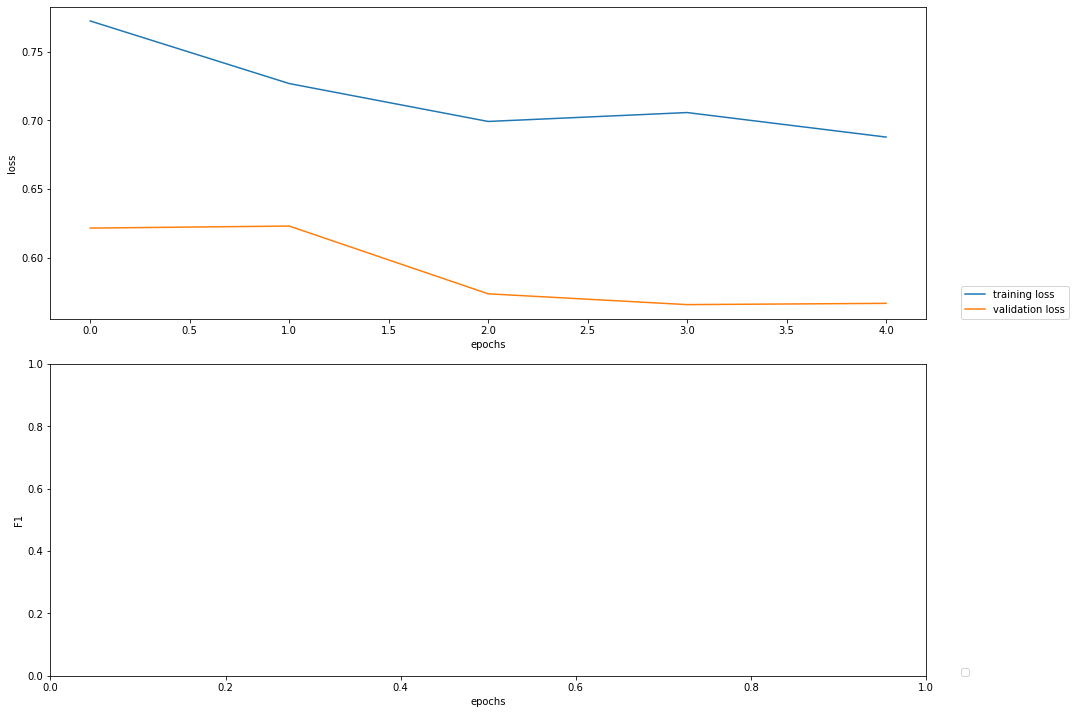

/content/drive/MyDrive/models/tweets/k7_means_keyword_str
----------------------------------------------------------------------------
Now we are processing column  --> k7_means_keyword_str


2020-12-23 16:06:42,847 Reading data from /content/drive/MyDrive/real_not_6
2020-12-23 16:06:42,848 Train: /content/drive/MyDrive/real_not_6/train.txt
2020-12-23 16:06:42,852 Dev: /content/drive/MyDrive/real_not_6/dev.txt
2020-12-23 16:06:42,854 Test: /content/drive/MyDrive/real_not_6/test.txt
2020-12-23 16:06:42,903 Computing label dictionary. Progress:


100%|██████████| 6752/6752 [00:02<00:00, 2481.24it/s]

2020-12-23 16:06:46,054 [b'1', b'0']


2020-12-23 16:06:49,792 ----------------------------------------------------------------------------------------------------
2020-12-23 16:06:49,794 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): StackedEmbeddings(
        (list_embedding_0): FlairEmbeddings(
          (lm): LanguageModel(
            (drop): Dropout(p=0.05, inplace=False)
            (encoder): Embedding(300, 100)
            (rnn): LSTM(100, 2048)
            (decoder): Linear(in_features=2048, out_features=300, bias=True)
          )
        )
        (list_embedding_1): FlairEmbeddings(
          (lm): LanguageModel(
            (drop): Dropout(p=0.05, inplace=False)
            (encoder): Embedding(300, 100)
            (rnn): LSTM(100, 2048)
            (decoder): Linear(in_features=2048, out_features=300, bias=True)
          )
        )
        (list_embedding_2): TransformerWordEmbeddings(
          (model): DistilBertModel

No handles with labels found to put in legend.


Loss and F1 plots are saved in /content/models/tweets/training.png


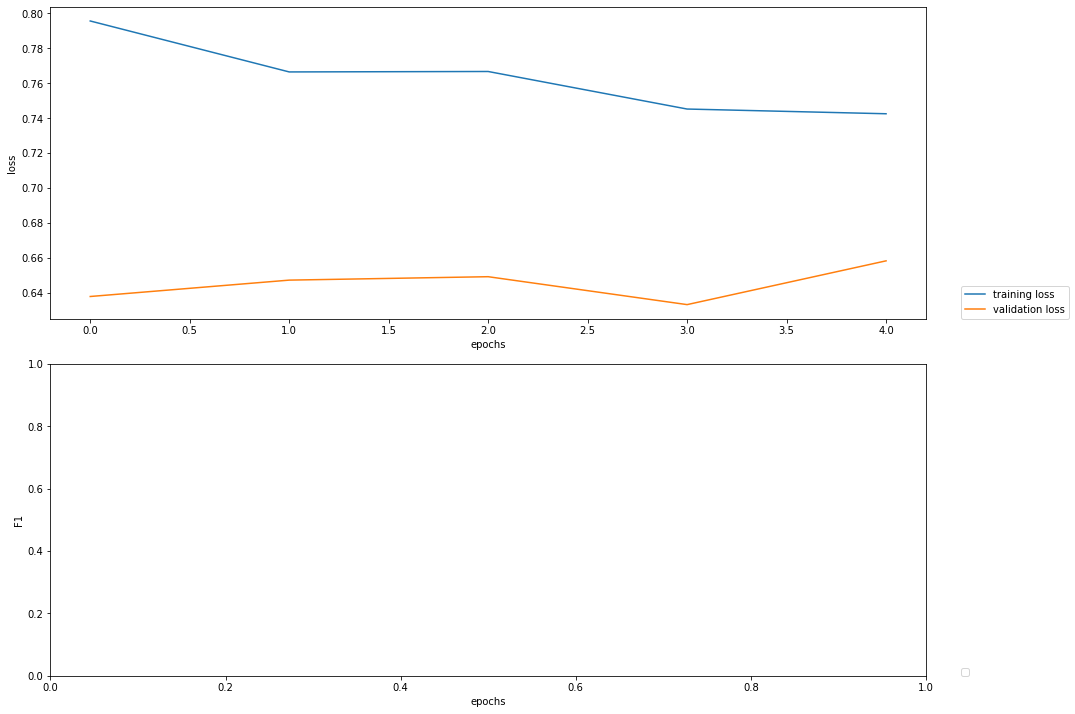

In [ ]:
train_plot(columns)


so if it works lets do the same for 

In [ ]:
train['k70_means_text_str'] = '__topic__' + train['k70_means_text'].astype(str)
train['k7_means_text_str'] = '__topic__' + train['k7_means_text'].astype(str)

In [ ]:
columns=['k70_means_text_str',
       'k7_means_text_str']

/content/drive/MyDrive/models/tweets/k70_means_text_str
----------------------------------------------------------------------------
Now we are processing column  --> k70_means_text_str


2020-12-23 16:46:28,064 Reading data from /content/drive/MyDrive/real_not_6
2020-12-23 16:46:28,067 Train: /content/drive/MyDrive/real_not_6/train.txt
2020-12-23 16:46:28,068 Dev: /content/drive/MyDrive/real_not_6/dev.txt
2020-12-23 16:46:28,071 Test: /content/drive/MyDrive/real_not_6/test.txt
2020-12-23 16:46:28,127 Computing label dictionary. Progress:


100%|██████████| 6752/6752 [00:02<00:00, 2470.30it/s]

2020-12-23 16:46:31,365 [b'1', b'0']


2020-12-23 16:46:34,657 ----------------------------------------------------------------------------------------------------
2020-12-23 16:46:34,660 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): StackedEmbeddings(
        (list_embedding_0): FlairEmbeddings(
          (lm): LanguageModel(
            (drop): Dropout(p=0.05, inplace=False)
            (encoder): Embedding(300, 100)
            (rnn): LSTM(100, 2048)
            (decoder): Linear(in_features=2048, out_features=300, bias=True)
          )
        )
        (list_embedding_1): FlairEmbeddings(
          (lm): LanguageModel(
            (drop): Dropout(p=0.05, inplace=False)
            (encoder): Embedding(300, 100)
            (rnn): LSTM(100, 2048)
            (decoder): Linear(in_features=2048, out_features=300, bias=True)
          )
        )
        (list_embedding_2): TransformerWordEmbeddings(
          (model): DistilBertModel

No handles with labels found to put in legend.


Loss and F1 plots are saved in /content/models/tweets/training.png


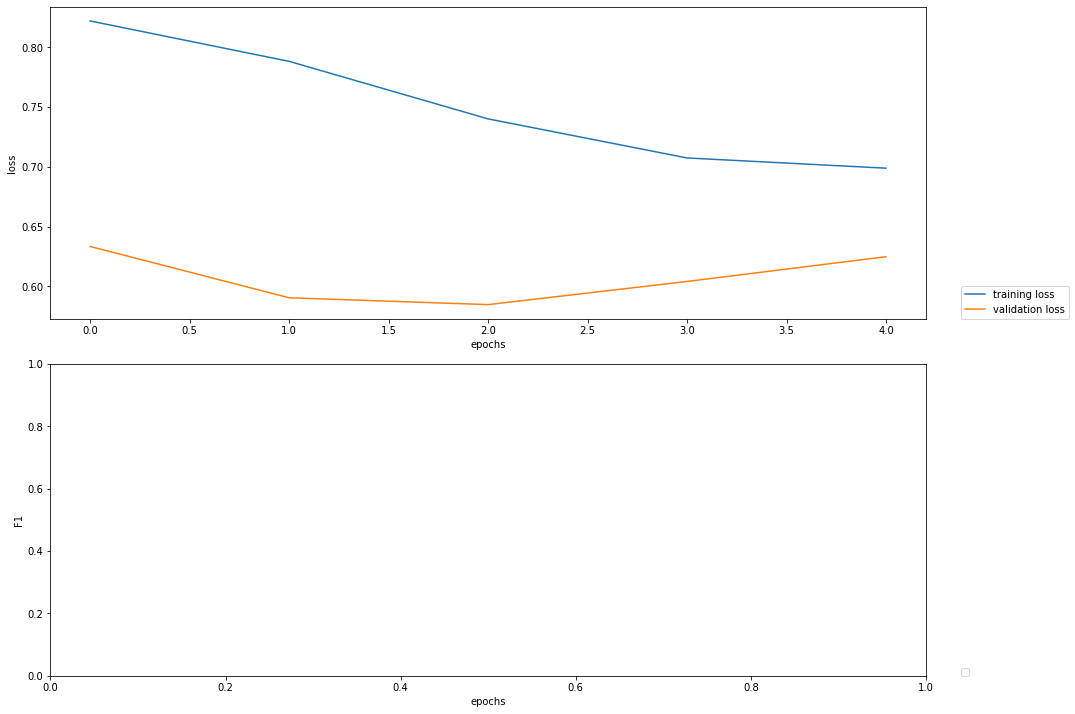

/content/drive/MyDrive/models/tweets/k7_means_text_str
----------------------------------------------------------------------------
Now we are processing column  --> k7_means_text_str


2020-12-23 16:58:55,649 Reading data from /content/drive/MyDrive/real_not_6
2020-12-23 16:58:55,650 Train: /content/drive/MyDrive/real_not_6/train.txt
2020-12-23 16:58:55,650 Dev: /content/drive/MyDrive/real_not_6/dev.txt
2020-12-23 16:58:55,652 Test: /content/drive/MyDrive/real_not_6/test.txt
2020-12-23 16:58:55,702 Computing label dictionary. Progress:


100%|██████████| 6752/6752 [00:02<00:00, 2533.96it/s]

2020-12-23 16:58:58,843 [b'1', b'0']


2020-12-23 16:59:02,214 ----------------------------------------------------------------------------------------------------
2020-12-23 16:59:02,216 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): StackedEmbeddings(
        (list_embedding_0): FlairEmbeddings(
          (lm): LanguageModel(
            (drop): Dropout(p=0.05, inplace=False)
            (encoder): Embedding(300, 100)
            (rnn): LSTM(100, 2048)
            (decoder): Linear(in_features=2048, out_features=300, bias=True)
          )
        )
        (list_embedding_1): FlairEmbeddings(
          (lm): LanguageModel(
            (drop): Dropout(p=0.05, inplace=False)
            (encoder): Embedding(300, 100)
            (rnn): LSTM(100, 2048)
            (decoder): Linear(in_features=2048, out_features=300, bias=True)
          )
        )
        (list_embedding_2): TransformerWordEmbeddings(
          (model): DistilBertModel

No handles with labels found to put in legend.


Loss and F1 plots are saved in /content/models/tweets/training.png


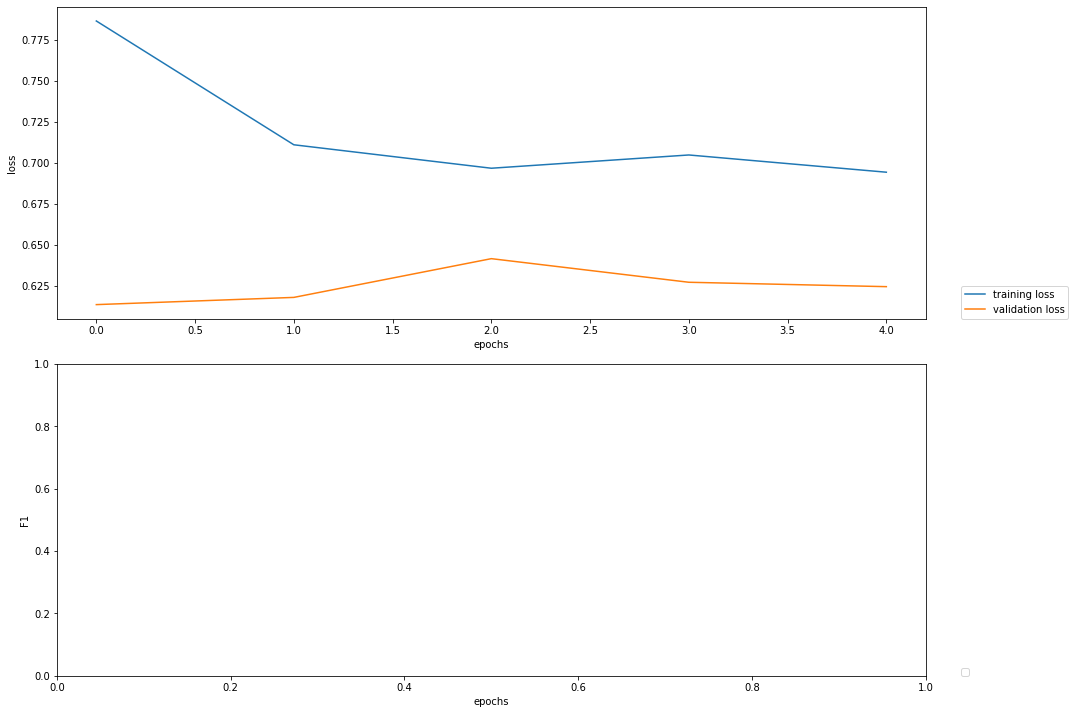

In [ ]:
train_plot(columns)


k70 had much better results so now I put everthing that gave this extra to new column

In [ ]:
train.sample(10).T

2597  ...                                               6307
id                                                                        3726  ...                                               9012
keyword                                                              destroyed  ...                                          stretcher
location                                                           Live4Heed??  ...                                            Florida
text                                        the way he did me  destroyed me...  ...  Homemade frozen yogurt pops? Have you had luck...
target                                                                       0  ...                                                  0
keyword_cleaner                                                      destroyed  ...                                          stretcher
location_cleaner                                                     live4heed  ...                                            florida
text_cleaner                                                     way destroyed  ...  homemade frozen yogurt pops luck making httpco...
text_cleaner_1                                                   way destroyed  ...  homemade frozen yogurt pops luck making httpco...
vectors_keyword              [0.71147335, -0.0142059615, 0.53805226, -0.412...  ...  [-0.66370976, -0.20082016, 0.7797324, -0.37746...
vectors_text                 [-0.24588671, -0.081714354, -0.059185106, 0.04...  ...  [-0.9992711, -0.941017, 0.9697128, -0.9698699,...
k70_means_text                                                              37  ...                                                 22
k7_means_text                                                                2  ...                                                  4
k70_means_keyword                                                           68  ...                                                 11
k7_means_keyword                                                             5  ...                                                  4
k70_x2_and_text_and_keyword             __text__37 __keyword__68 way destroyed  ...  __text__22 __keyword__11 homemade frozen yogur...

[16 rows x 10 columns]

In [ ]:
train['k70_x2_and_text_and_keyword'] =  '__text__' + train['k70_means_text'].astype(str)+  ' '+ '__keyword__' + train['k70_means_keyword'].astype(str)+' '+  train['text_cleaner']

In [ ]:
 columns=['k70_x2_and_text_and_keyword']

/content/drive/MyDrive/models/tweets/k70_x2_and_text_and_keyword
----------------------------------------------------------------------------
Now we are processing column  --> k70_x2_and_text_and_keyword


2020-12-24 10:38:49,244 Reading data from /content/drive/MyDrive/real_not_6
2020-12-24 10:38:49,245 Train: /content/drive/MyDrive/real_not_6/train.txt
2020-12-24 10:38:49,245 Dev: /content/drive/MyDrive/real_not_6/dev.txt
2020-12-24 10:38:49,253 Test: /content/drive/MyDrive/real_not_6/test.txt
2020-12-24 10:38:49,307 Computing label dictionary. Progress:


100%|██████████| 6725/6725 [00:03<00:00, 1749.73it/s]

2020-12-24 10:38:53,529 [b'1.0', b'0.0']


2020-12-24 10:38:56,070 ----------------------------------------------------------------------------------------------------
2020-12-24 10:38:56,072 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): StackedEmbeddings(
        (list_embedding_0): FlairEmbeddings(
          (lm): LanguageModel(
            (drop): Dropout(p=0.05, inplace=False)
            (encoder): Embedding(300, 100)
            (rnn): LSTM(100, 2048)
            (decoder): Linear(in_features=2048, out_features=300, bias=True)
          )
        )
        (list_embedding_1): FlairEmbeddings(
          (lm): LanguageModel(
            (drop): Dropout(p=0.05, inplace=False)
            (encoder): Embedding(300, 100)
            (rnn): LSTM(100, 2048)
            (decoder): Linear(in_features=2048, out_features=300, bias=True)
          )
        )
        (list_embedding_2): TransformerWordEmbeddings(
          (model): DistilBertModel

No handles with labels found to put in legend.


Loss and F1 plots are saved in /content/models/tweets/training.png


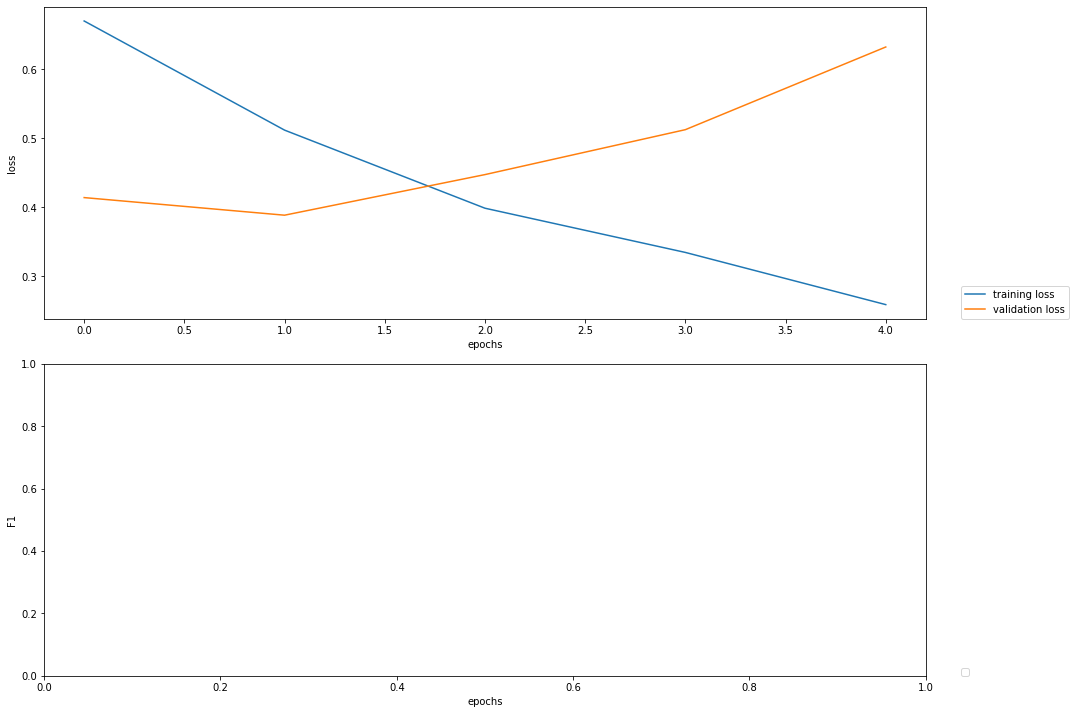

In [ ]:
train_plot(columns)

And results after calculating are 

In [ ]:
def make_pred(txt):
    sent = Sentence(str(txt))
    classifier.predict(sent)
    return int(float(sent.labels[0].value))

classifier = TextClassifier.load('/content/drive/MyDrive/models/tweets/k70_x2_and_text_and_keyword/best-model.pt')

test['target'] = test.keyword.map(make_pred)
test[ ['id', 'target'] ].to_csv('flair_distil_all.csv', index=False)

2020-12-24 11:25:34,550 loading file /content/drive/MyDrive/models/tweets/k70_x2_and_text_and_keyword/best-model.pt


Results are worse compared with initial simple automatic approach.
That proves how good/opimised Flair Framework  to get best results.
Tweaking does not give better results. Most likelly extensive text cleaning and
deciphering abbreviation and other shorcuts could do better result